In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [14]:
df = pd.read_csv("cleaned_df.csv")

In [15]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,avg_Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,4,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,2,11,10.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,6,12,12.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,0,14,14.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,0,13,12.0


In [18]:
numerical_columns = df.select_dtypes(include=['int64','Float64'])


<Axes: >

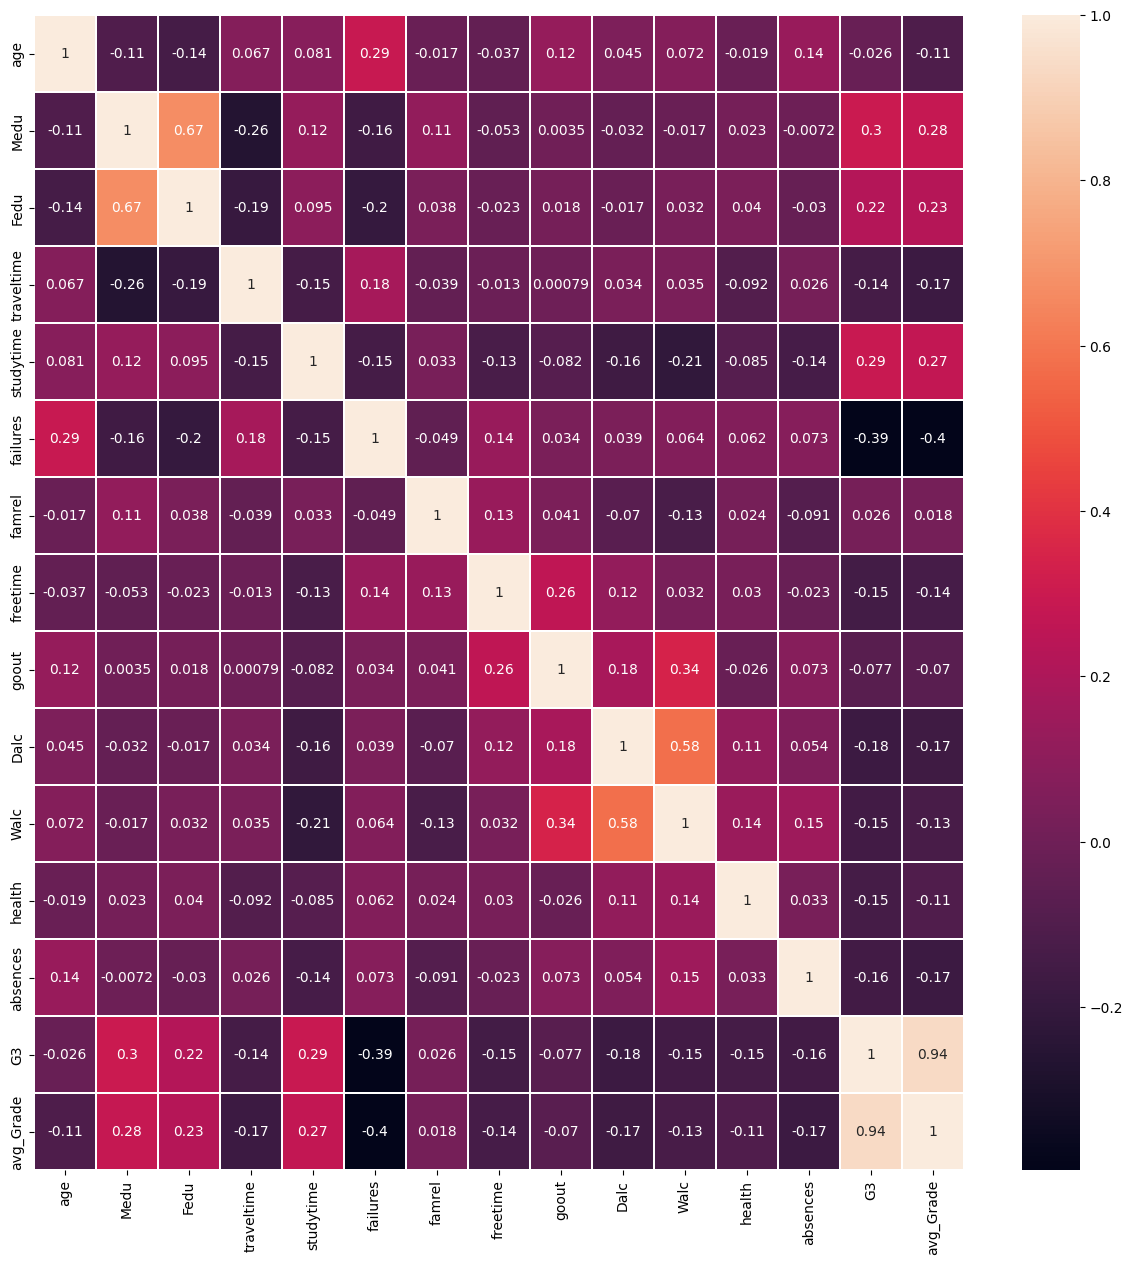

In [17]:
fig = plt.figure(figsize=(15, 15))

sns.heatmap(numerical_columns.corr(),annot=True, linewidths=0.05)

- There exists multicolinearity between Medu and Fedu so we will drop one of them
- There exists multicolinearity between Malc and Dalc so we will drop one of them

In [19]:
df.drop(columns=["Walc","Fedu"],inplace =True)

In [20]:
categorical_columns = [c for c  in df.columns if c not in numerical_columns]
categorical_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

<Axes: >

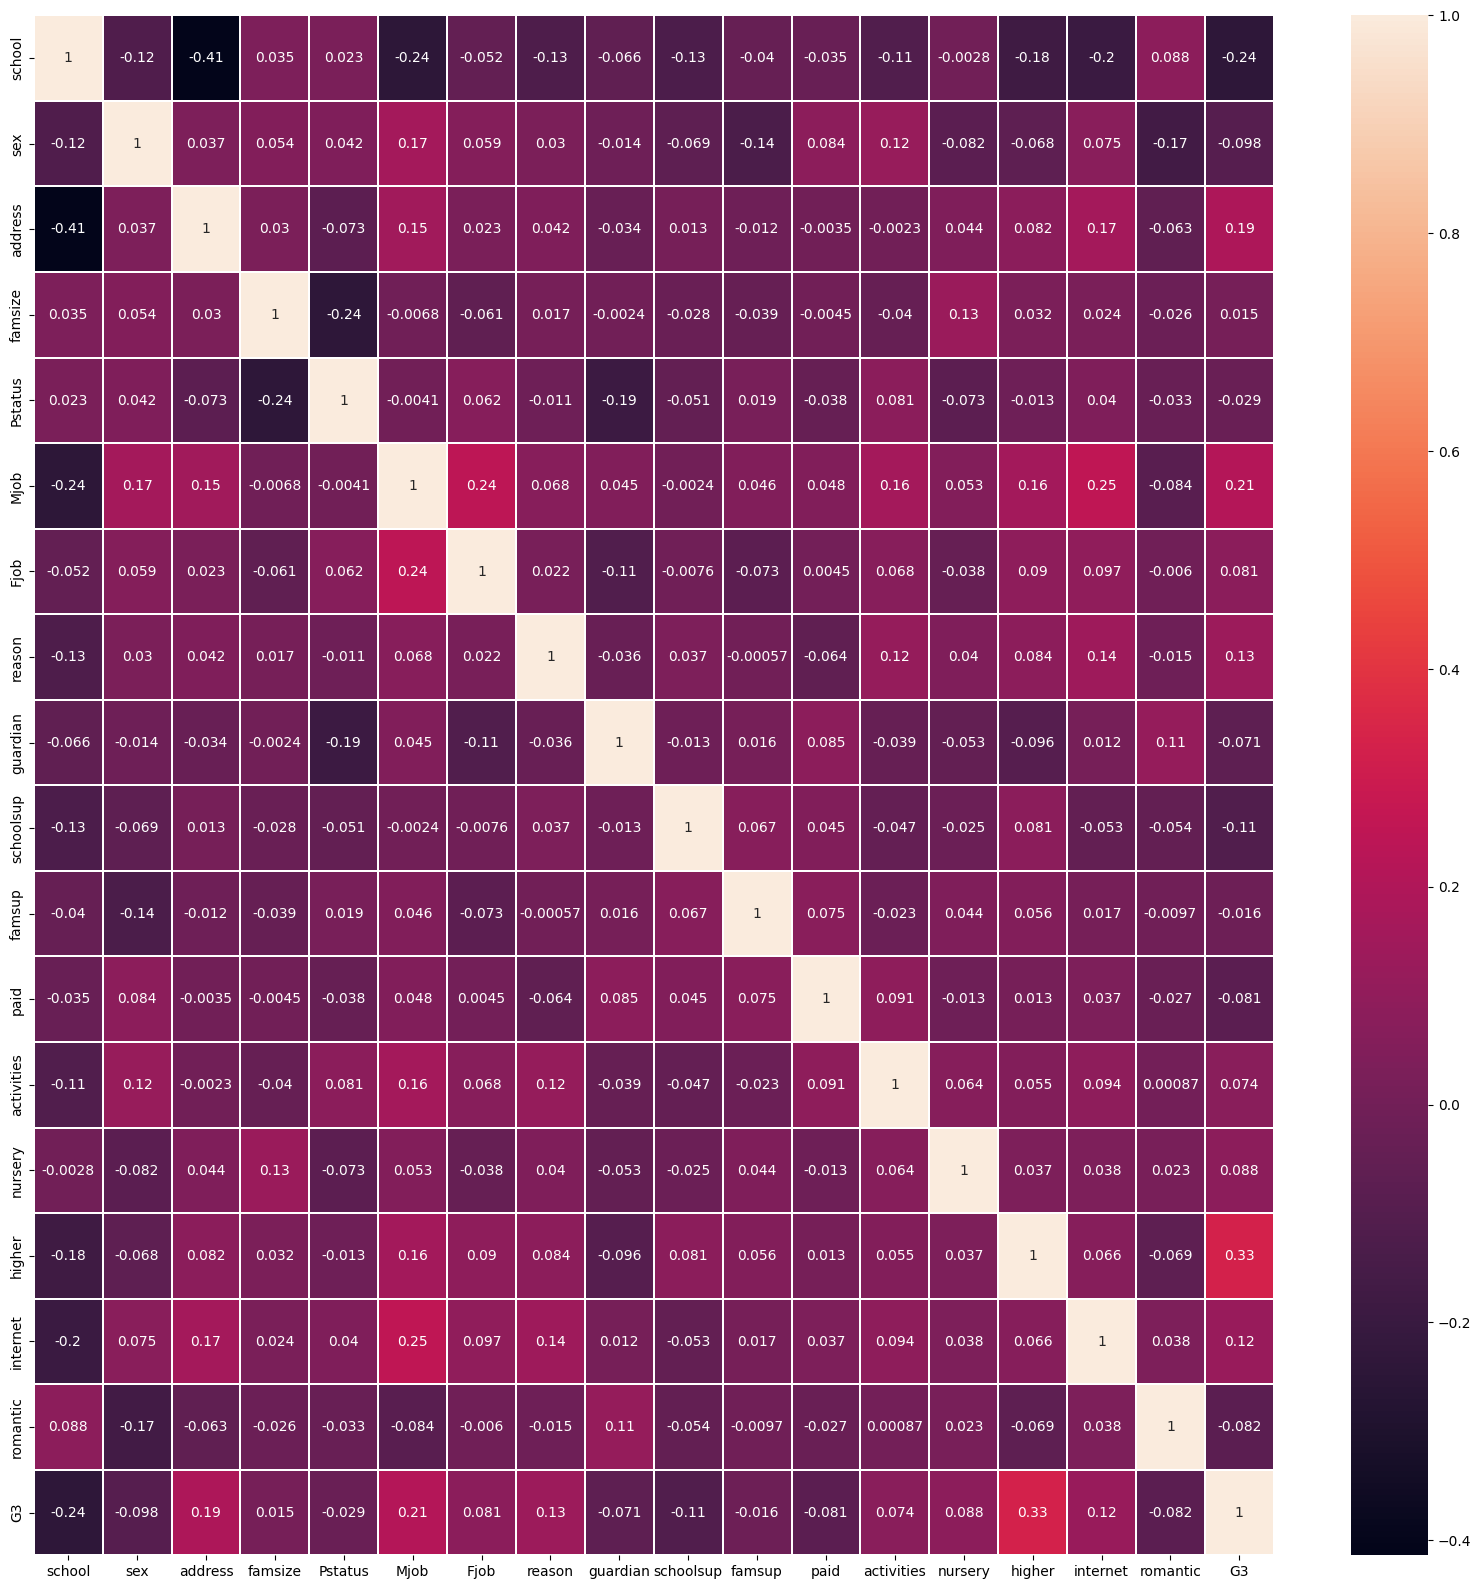

In [21]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
ordinal_encoded_df = ordinal_encoder.fit_transform(df[categorical_columns])
fig = plt.figure(figsize=(20, 20))

ordinal_encoded_df = pd.DataFrame(ordinal_encoded_df,columns=categorical_columns)
ordinal_encoded_df["G3"] = df["G3"]
sns.heatmap(ordinal_encoded_df.corr(),annot=True, linewidths=0.05)


There is no multi colinearity and no high correlation between any of the categorical features and our target

# Here We begin with hypothesis testing   

## First define our hypothesis and get a general function for hypothesis test

1-Null Hypothesis(H0): the two categories in binary columns  in our dataset have the same performance regarding average grades
2-Alternative Hypothesis(H1): the  two categories in binary columns in our dataset have different perfromance regarding Final average

Here we choose binary categorical columns


In [22]:
binary_categorical_columns=[c for c in categorical_columns if len(df[c].unique()) == 2] #here we choose colmns that have only 2 values(categories)

In [23]:
from scipy import stats


def hypothesis_test(column):  # we give this function a binary categorical columns and we do hypothesis test on its two categories to see whether their average final grade will differ
    cat1 = df[column].unique()[0]
    cat2 = df[column].unique()[1]
    
    df1 = df[df[column] == cat1]
    df2 = df[df[column] == cat2]
    
    X0 = np.mean(df1["G3"])
    X1 = np.mean(df2["G3"])
    X_bar = X0 - X1
    
    Sigma1 = np.std(df1["G3"])
    Sigma2 = np.std(df2["G3"])
    
    Sig_1 = (Sigma1**2)/len(df1)
    Sig_2 = (Sigma2**2)/len(df2)
    SE = np.sqrt(Sig_1+Sig_2)
    
    Z_score = X_bar/SE  # we use Z_score because n>30
    p_value = 2 * stats.norm.cdf(-abs(Z_score))
    alpha = 0.05

    if p_value < alpha:
        print(f"Reject the null hypothesis. The means are significantly different (p-value = {p_value:.04f})")
        return True
    else:
        print(f"Fail to reject the null hypothesis. The means are not significantly different (p-value = {p_value:.04f})")
        return False


In [26]:
Rejected = []
non_rejected = []

for column in binary_categorical_columns:
    print("Hypothesis test for column : ", column)
    if (hypothesis_test(column)):
        Rejected.append(column)
    else:
        non_rejected.append(column)
    print("-----------------------------------------------------")


Hypothesis test for column :  school
Reject the null hypothesis. The means are significantly different (p-value = 0.0000)
-----------------------------------------------------
Hypothesis test for column :  sex
Reject the null hypothesis. The means are significantly different (p-value = 0.0353)
-----------------------------------------------------
Hypothesis test for column :  address
Reject the null hypothesis. The means are significantly different (p-value = 0.0000)
-----------------------------------------------------
Hypothesis test for column :  famsize
Fail to reject the null hypothesis. The means are not significantly different (p-value = 0.7430)
-----------------------------------------------------
Hypothesis test for column :  Pstatus
Fail to reject the null hypothesis. The means are not significantly different (p-value = 0.5183)
-----------------------------------------------------
Hypothesis test for column :  schoolsup
Reject the null hypothesis. The means are significantly 

In [27]:
print("Categories that differ from one another (affect our data): ")
print(Rejected)
print("Categories that do not differ alot from one another( not significant enough to know whether it affects or not):")
print(non_rejected)


Categories that differ from one another (affect our data): 
['school', 'sex', 'address', 'schoolsup', 'higher', 'internet']
Categories that do not differ alot from one another( not significant enough to know whether it affects or not):
['famsize', 'Pstatus', 'famsup', 'paid', 'activities', 'nursery', 'romantic']
